In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import raw data:

In [464]:
df = pd.read_csv("../data/raw_data.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


In [465]:
df.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

## Dealing with categorical features

Categorical columns in dataset:

In [470]:
df.select_dtypes(include = 'object').nunique()[df.nunique() < 51].sort_values()

company_size           3
employment_type        4
education_required     4
experience_level       4
salary_currency        8
industry              15
company_name          16
job_title             20
company_location      20
employee_residence    50
dtype: int64

Unique values in categorical features: 

In [473]:
cat_feats = df.select_dtypes(include = 'object').nunique()[df.nunique() < 51].index

In [474]:
for col in cat_feats:
    print(f"{col}: {df[col].unique()}\n")

job_title: ['Data Scientist' 'Head of AI' 'Data Engineer' 'Computer Vision Engineer'
 'Robotics Engineer' 'AI Consultant' 'Machine Learning Engineer'
 'Deep Learning Engineer' 'Principal Data Scientist' 'AI Product Manager'
 'Machine Learning Researcher' 'AI Software Engineer' 'ML Ops Engineer'
 'AI Architect' 'AI Specialist' 'Data Analyst' 'Research Scientist'
 'Autonomous Systems Engineer' 'NLP Engineer' 'AI Research Scientist']

salary_currency: ['USD' 'JPY' 'EUR' 'SGD' 'CAD' 'AUD' 'GBP' 'CHF']

experience_level: ['EX' 'MI' 'EN' 'SE']

employment_type: ['PT' 'CT' 'FL' 'FT']

company_location: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Singapore' 'Canada'
 'Australia' 'United Kingdom' 'Denmark' 'United States' 'Norway' 'India'
 'Switzerland' 'Netherlands' 'Ireland' 'Austria' 'China' 'Israel'
 'South Korea']

company_size: ['M' 'L' 'S']

employee_residence: ['Sweden' 'Japan' 'Germany' 'Finland' 'France' 'Norway' 'Poland' 'Vietnam'
 'United Kingdom' 'Denmark' 'United States' 'Belg

Features `experience_level`, `company_size`, and `education_required` will be encoded with **ordinal encoding** because their categories have a natural increasing order.


## Ordinal Encoding

In [479]:
from sklearn.preprocessing import OrdinalEncoder

Function for ordinal encoding:

In [481]:
def encode_ordinal(df, column_name, categories):
    encoder = OrdinalEncoder(categories = [categories])
    new_data = encoder.fit_transform(df[[column_name]])
    return new_data

Initial unique values: 

In [485]:
df['experience_level'].unique()

array(['EX', 'MI', 'EN', 'SE'], dtype=object)

In [487]:
df['experience_level'] = encode_ordinal(df, 'experience_level', ['EN', 'MI', 'SE', 'EX'])

Values after encoding: 

In [490]:
df['experience_level'].unique()


array([3., 1., 0., 2.])

In [492]:
df['company_size'] = encode_ordinal(df, 'company_size', ['S', 'M', 'L'])


In [494]:
df['education_required'] = encode_ordinal(df, 'education_required', ['Associate', 'Bachelor', 'Master', 'PhD'])

Other categorical features to encode: 

In [497]:
df.select_dtypes(include = 'object').nunique()[df.nunique() < 51].sort_values()

employment_type        4
salary_currency        8
industry              15
company_name          16
company_location      20
job_title             20
employee_residence    50
dtype: int64

## One- Hot Encoding

`employment_type` and `salary_currency` will be encoded with one hot encoding as they do not have many unique values

In [501]:
df = pd.get_dummies(df, columns = ['employment_type', 'salary_currency'], drop_first = True)


In [503]:
df.head()

,job_id,job_title,salary_usd,salary_local,experience_level,company_location,company_size,employee_residence,remote_ratio,required_skills,...,employment_type_FL,employment_type_FT,employment_type_PT,salary_currency_CAD,salary_currency_CHF,salary_currency_EUR,salary_currency_GBP,salary_currency_JPY,salary_currency_SGD,salary_currency_USD
0,AI00001,Data Scientist,219728,219728,3.0,Sweden,1.0,Sweden,0,"Python, Computer Vision, R, Docker",...,False,False,True,False,False,False,False,False,False,True
1,AI00002,Head of AI,230237,25326070,3.0,Japan,2.0,Japan,50,"Kubernetes, MLOps, Tableau, Python",...,False,False,True,False,False,False,False,True,False,False
2,AI00003,Data Engineer,128890,109557,3.0,Germany,0.0,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",...,False,False,False,False,False,True,False,False,False,False
3,AI00004,Computer Vision Engineer,96349,96349,1.0,Finland,2.0,Finland,50,"MLOps, Linux, Tableau, Python",...,True,False,False,False,False,False,False,False,False,True
4,AI00005,Robotics Engineer,63065,53605,0.0,France,0.0,France,100,"R, Scala, SQL, GCP, Python",...,False,True,False,False,False,True,False,False,False,False


Remaining categorical features: 

In [506]:
df.select_dtypes(include = 'object').nunique()[df.nunique() < 51].sort_values()

industry              15
company_name          16
company_location      20
job_title             20
employee_residence    50
dtype: int64

## Target Encoding

In [509]:
from category_encoders import MEstimateEncoder

In [511]:
me_encoder = MEstimateEncoder(cols = ['industry', 'company_name', 'company_location', 'job_title',
       'employee_residence'], m = 5)

Splitting initiial dataframe to target and features:

In [514]:
X = df.drop('salary_usd', axis = 1)
y = df['salary_usd']

In [516]:
me_encoder.fit(X, y)

MEstimateEncoder(cols=['industry', 'company_name', 'company_location',
                       'job_title', 'employee_residence'],
                 m=5)

In [517]:
X = me_encoder.transform(X)

In [518]:
X.head()

,job_id,job_title,salary_local,experience_level,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,...,employment_type_FL,employment_type_FT,employment_type_PT,salary_currency_CAD,salary_currency_CHF,salary_currency_EUR,salary_currency_GBP,salary_currency_JPY,salary_currency_SGD,salary_currency_USD
0,AI00001,122840.684494,219728,3.0,123530.217563,1.0,125832.356129,0,"Python, Computer Vision, R, Docker",0.0,...,False,False,True,False,False,False,False,False,False,True
1,AI00002,120265.207778,25326070,3.0,131226.800122,2.0,129660.450729,50,"Kubernetes, MLOps, Tableau, Python",1.0,...,False,False,True,False,False,False,False,True,False,False
2,AI00003,127497.966009,109557,3.0,122934.071493,0.0,123778.560219,100,"Spark, Scala, Hadoop, PyTorch, GCP",1.0,...,False,False,False,False,False,True,False,False,False,False
3,AI00004,121180.102792,96349,1.0,116306.613681,2.0,117272.316709,50,"MLOps, Linux, Tableau, Python",3.0,...,True,False,False,False,False,False,False,False,False,True
4,AI00005,121027.372479,53605,0.0,114742.881553,0.0,115660.849752,100,"R, Scala, SQL, GCP, Python",0.0,...,False,True,False,False,False,True,False,False,False,False


In [521]:
df = pd.concat([y, X], axis = 1)

### No more categorical features: 

In [525]:
df.select_dtypes(include = 'object').nunique()[df.nunique() < 51].sort_values()

Series([], dtype: int64)

## Dealing with dates

There are 2 columns with date: `posting_date` and `application_deadline`

Initially, I change the data type of these columns to datetime.

In [529]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])

In [530]:
df[['posting_date','application_deadline']].head()

,posting_date,application_deadline
0,2024-09-23,2024-10-31
1,2024-07-26,2024-09-12
2,2025-01-19,2025-03-28
3,2024-07-20,2024-09-06
4,2025-03-16,2025-05-09


After that I add column `posting_duration` (how much time a vacancy was opened) and drop old columns

In [535]:
df['posting_duration'] = abs(df['posting_date'] - df['application_deadline']).dt.days

In [536]:
df = df.drop(['posting_date', 'application_deadline'], axis = 1)

In [539]:
df.head()

,salary_usd,job_id,job_title,salary_local,experience_level,company_location,company_size,employee_residence,remote_ratio,required_skills,...,employment_type_FT,employment_type_PT,salary_currency_CAD,salary_currency_CHF,salary_currency_EUR,salary_currency_GBP,salary_currency_JPY,salary_currency_SGD,salary_currency_USD,posting_duration
0,219728,AI00001,122840.684494,219728,3.0,123530.217563,1.0,125832.356129,0,"Python, Computer Vision, R, Docker",...,False,True,False,False,False,False,False,False,True,38
1,230237,AI00002,120265.207778,25326070,3.0,131226.800122,2.0,129660.450729,50,"Kubernetes, MLOps, Tableau, Python",...,False,True,False,False,False,False,True,False,False,48
2,128890,AI00003,127497.966009,109557,3.0,122934.071493,0.0,123778.560219,100,"Spark, Scala, Hadoop, PyTorch, GCP",...,False,False,False,False,True,False,False,False,False,68
3,96349,AI00004,121180.102792,96349,1.0,116306.613681,2.0,117272.316709,50,"MLOps, Linux, Tableau, Python",...,False,False,False,False,False,False,False,False,True,48
4,63065,AI00005,121027.372479,53605,0.0,114742.881553,0.0,115660.849752,100,"R, Scala, SQL, GCP, Python",...,True,False,False,False,True,False,False,False,False,54


## MultiLabelBinarizer

For column `required skills` I use MultiLabelBinarizer to understand impact of each skill on target

In [543]:
from sklearn.preprocessing import MultiLabelBinarizer

In [545]:
df['required_skills'][:5]

0    Python, Computer Vision, R, Docker
1    Kubernetes, MLOps, Tableau, Python
2    Spark, Scala, Hadoop, PyTorch, GCP
3         MLOps, Linux, Tableau, Python
4            R, Scala, SQL, GCP, Python
Name: required_skills, dtype: object

In [547]:
skills_list = df['required_skills'].apply(lambda x: [s.strip() for s in x.split(',')])
skills_list

0                     [Python, Computer Vision, R, Docker]
1                     [Kubernetes, MLOps, Tableau, Python]
2                     [Spark, Scala, Hadoop, PyTorch, GCP]
3                          [MLOps, Linux, Tableau, Python]
4                             [R, Scala, SQL, GCP, Python]
                               ...                        
14995             [Azure, R, NLP, Docker, Computer Vision]
14996    [Python, TensorFlow, Mathematics, AWS, Compute...
14997        [Azure, Kubernetes, Spark, Statistics, MLOps]
14998    [MLOps, Statistics, Data Visualization, R, Pyt...
14999    [AWS, Spark, Computer Vision, Data Visualizati...
Name: required_skills, Length: 15000, dtype: object

In [549]:
mlb = MultiLabelBinarizer()

How dataframe with encpded skills looks like:

In [552]:
skills_transformed = mlb.fit_transform(skills_list)
skills_encoded = pd.DataFrame(skills_transformed,columns=mlb.classes_, index = skills_list.index)
skills_encoded

,AWS,Azure,Computer Vision,Data Visualization,Deep Learning,Docker,GCP,Git,Hadoop,Java,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
14996,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
14997,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
14998,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [553]:
df = pd.concat([df, skills_encoded], axis = 1)

In [556]:
df = df.drop('required_skills', axis = 1)

Let's add new dataframe to X_train

In [559]:
df.head()

,salary_usd,job_id,job_title,salary_local,experience_level,company_location,company_size,employee_residence,remote_ratio,education_required,...,NLP,PyTorch,Python,R,SQL,Scala,Spark,Statistics,Tableau,TensorFlow
0,219728,AI00001,122840.684494,219728,3.0,123530.217563,1.0,125832.356129,0,0.0,...,0,0,1,1,0,0,0,0,0,0
1,230237,AI00002,120265.207778,25326070,3.0,131226.800122,2.0,129660.450729,50,1.0,...,0,0,1,0,0,0,0,0,1,0
2,128890,AI00003,127497.966009,109557,3.0,122934.071493,0.0,123778.560219,100,1.0,...,0,1,0,0,0,1,1,0,0,0
3,96349,AI00004,121180.102792,96349,1.0,116306.613681,2.0,117272.316709,50,3.0,...,0,0,1,0,0,0,0,0,1,0
4,63065,AI00005,121027.372479,53605,0.0,114742.881553,0.0,115660.849752,100,0.0,...,0,0,1,1,1,1,0,0,0,0


## Correlation with new features

Drop the `job_id` column as it doesn't provide meaningful information.

In [563]:
df = df.drop(['job_id'], axis = 1)

### 5 The most important features: 

In [626]:
def plot_corr(df_corr):
    df_corr = abs(df_corr.sort_values(ascending = False))[1:10]
    width = np.arange(len(df_corr))
    ticks = list(df_corr.index)
    plt.barh(width, df_corr)
    plt.yticks(width, ticks)
    plt.title("Most important features:")
    

In [632]:
corr = pd.concat([X_train, y_train], axis = 1).corr(numeric_only = True)['salary_usd']

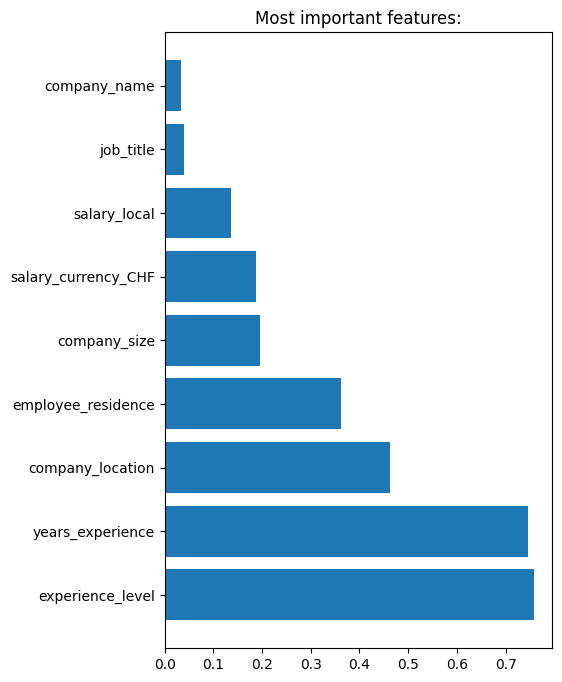

In [634]:
plt.figure(figsize = (5, 8))
plot_corr(corr)

### Save processed data for model training

In [581]:
df.to_csv("../data/processed_data.csv", index=False)